# <font color='Orange'> Docker Zero to One: Step by Step Data Ingestion in Postgres by Docker Containerization & Docker Compose</font>

## <font color='green'>Table of Contents</font>

<a href='#the_destination_1'>1) Introduction to Docker</a> \
<a href='#the_destination_2'>2) Ingesting NY Taxi Data to Postgres</a> \
<a href='#the_destination_3'>3) Connecting pgAdmin and Postgres</a> \
<a href='#the_destination_4'>4) Dockerizing the Ingestion Script</a> \
<a href='#the_destination_5'>5) Running Postgres and pgAdmin with Docker Compose</a> \


# <font color='green'><a id='the_destination_1'>1) Introduction to Docker</a></font>

Docker is a tool that helps developers create, share, and run applications in a consistent way. It packages everything an application needs into a single unit called a container, making it easy to run on any system with Docker installed. For data teams, Docker ensures that everyone uses the same setup, which is great for sharing and scaling tasks like data analysis or machine learning.
   

### <font color='green'>Use Cases</font>

Docker containers are used to package and run applications in a portable and isolated environment. Here are a few examples of how they can be used:

* <b>Web Applications</b>: Docker packages web apps, making them easy to deploy and scale

* <b>Database Management Systems</b>: Run and manage databases like MySQL or MongoDB easily.

* <b>Data Processing and Analysis</b>: Share and run data workflows seamlessly across different environments.

* <b>Machine Learning</b>: Package and deploy machine learning models consistently.

* <b>DevOps</b>: Containers can be used for CI/CD (Continuous Integration and Continuous Delivery) pipeline as well, for example, by packaging the application and its dependencies in a container, and then using tools like Jenkins or Travis CI to test, build, and deploy the container to a production environment.

These are just a few examples of the many ways that Docker containers can be used. In general, containers are a powerful tool for packaging, deploying, and scaling applications in a consistent and reproducible way.

# <font color='green'>1.1) Setting up Docker</font>

Setting up Docker involves the following steps:

1) <b>Install the Docker Engine</b>: Download and install Docker for your operating system.

2) <b>Verify the Installation</b>: Run docker version in your terminal to check if Docker is installed correctly.

3) <b>Create a Dockerfile</b>:Write a script (Dockerfile) that tells Docker how to build your application. To create a new Dockerfile, you can use a text editor and then save it with the name "Dockerfile" (without any file extension)

4) <b>Build the Image</b>: Use <b>'docker build'</b> to create an image from your Dockerfile. 

5) <b>Run the Container</b>: After building the image, you can use the <b>'docker run'</b> command to start a container from the image. The command takes the image name as an argument, and it will start the container with the environment and dependencies that are defined in the Dockerfile.

6) <b>Interact with the Container</b>: Once the container is running, you can use the <b>'docker exec'</b> command to start a shell session inside the container. This allows you to run commands and interact with the application that is running inside the container.

These steps get you started with Docker, making it easier to manage, share, and scale your applications and workflows.
    
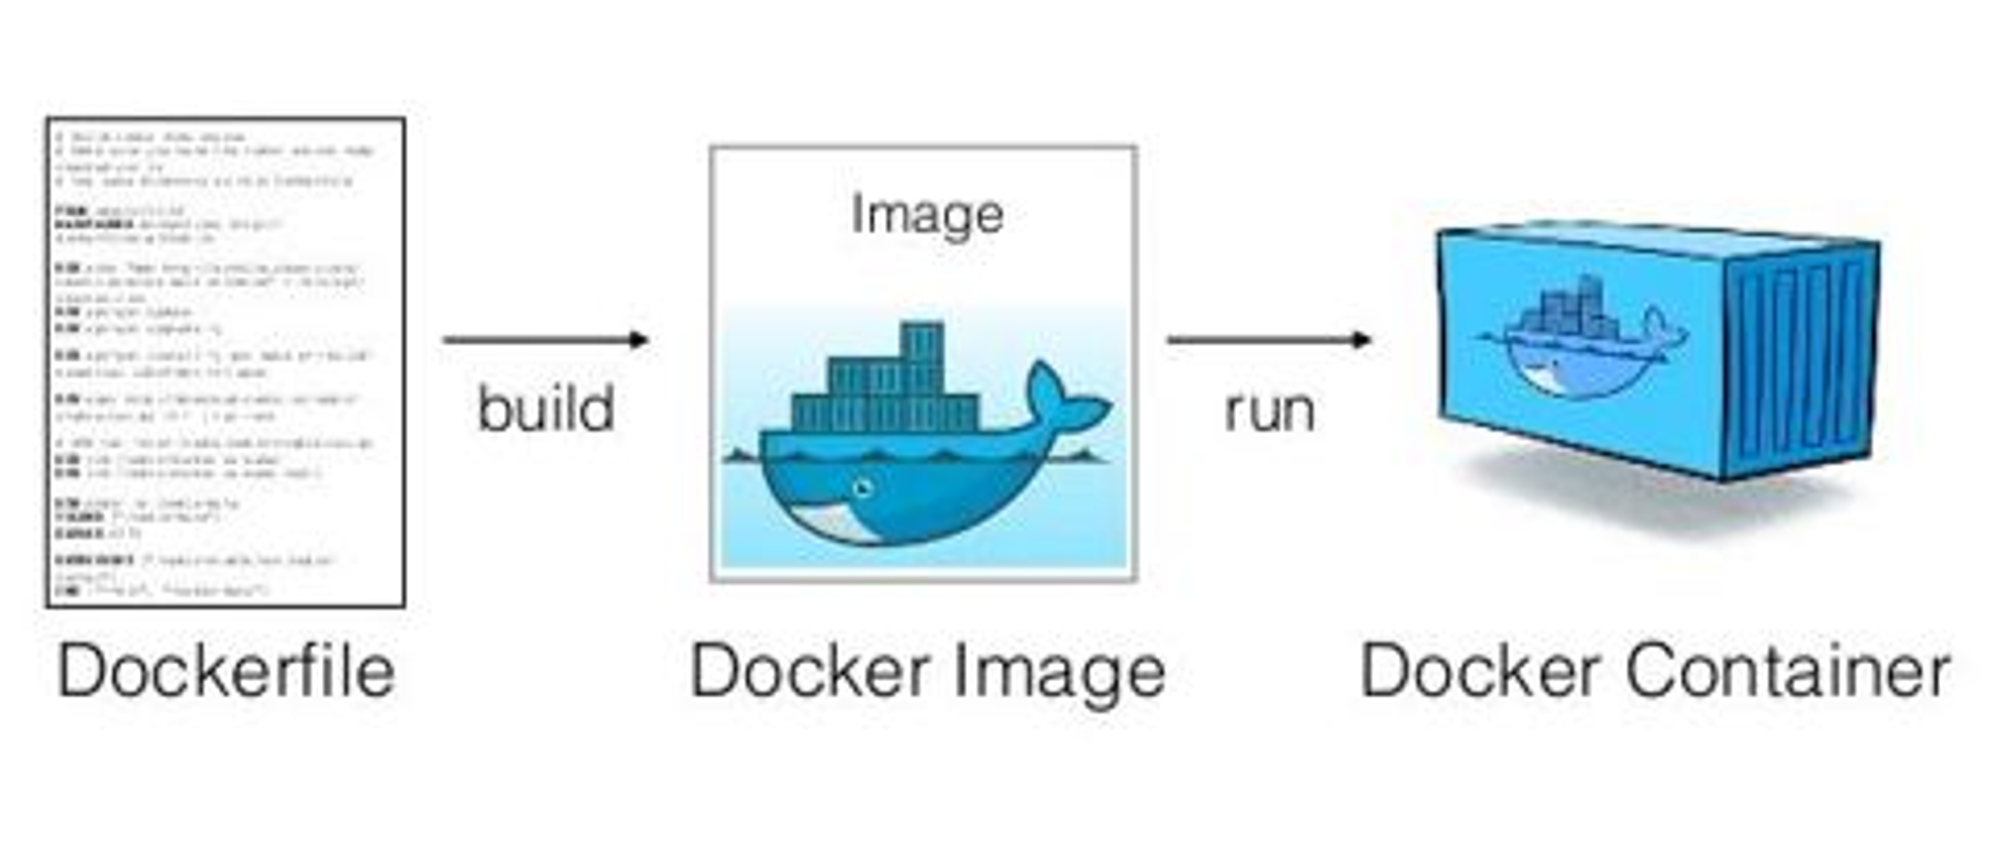

# <font color='green'>1.2) Running basic commands in GitBash after Docker installation</font>

## i) docker version

![image.png](images/image1.png)

## ii) docker run hello-world

![Alt text](images/image2.png)


## iii) docker run -it ubuntu bash

![Alt text](images/image3.png)



<b>NOTE</b>:

When running Docker commands on Windows, you may need to use the winpty command to run them in Git Bash. This is because the Docker client that runs on Windows communicates with the Docker daemon using the Docker for Windows service, which is not compatible with the Git Bash terminal.

winpty is a Windows version of the pty (pseudo-terminal) used in UNIX-like systems. It allows the Docker client to interact with the Windows console, allowing the user to run Docker commands in Git Bash as if they were running in a native Windows console window.

When you run a docker command in Git Bash without winpty, the command may fail or produce unexpected results, because Git Bash does not have the capability to interact with the Windows console.

Using winpty command before the docker command allows Git Bash to communicate with the Windows console and execute the command correctly. For example, instead of running docker run -it ubuntu, you would run winpty docker run -it ubuntu.

It's worth noting that this is a Windows-specific issue and is not required on other operating systems like Linux or Mac.



## iv) winpty docker run -it ubuntu bash

![Alt text](images/image4.png)


Now that we added winpty in front of the command, the command works. Let's see what it does below:

The command <b>docker run -it ubuntu bash</b> is used to start a new container based on the ubuntu image and run a <b>bash</b> shell inside it. The <b>docker run</b> command is used to start a new container from an image.

The <b>-i</b> flag stands for "interactive" and it keeps the stdin open, even if not attached. The <b>-t</b> flag stands for "tty", it allocates a pseudo-TTY, this makes the container to have a terminal-like interface.

When you run this command, Docker will first check if you already have the ubuntu image on your machine. If not, it will download the image from the public Docker registry, called Docker Hub.

Once the image is downloaded, Docker will create a new container from the image and start it. The <b>bash</b> command is passed as an argument to the <b>docker run</b> command, which tells Docker to run a <b>bash</b></b> shell inside the container. (As you can see from the image above)

The bash shell will be running in an interactive mode, which means you can run commands inside the container and see their output in the terminal. For example, you can run the command <b>ls</b> to see the list of files in the container's file system, or <b>apt-get install</b> to install additional packages.

When you're done interacting with the container, you can exit the bash shell by typing <b>exit</b> or <b>Ctrl+D</b>. This will stop the container, but the image will remain on your machine for later use.

# <font color='green'> 1.3) Building a Docker image and running a Container</font>

## i) code .

![Alt text](images/image5.png)

The command code . is used to open the current working directory in Visual Studio Code (VSCode), a popular code editor developed by Microsoft. The code command is the command line interface (CLI) for VSCode, and it allows you to open a folder or file in the editor directly from the command line.

The . at the end of the command is a shorthand for the current directory, so the command code . opens the current working directory in the VSCode editor. This can be useful when you want to quickly open a project or folder in VSCode without having to navigate through the file explorer.

It's worth noting that the code command is specific to VSCode and it's not a built-in command in the operating system. To use it, you need to have VSCode installed on your machine and the command line interface should be added to your system PATH during the installation process.
Also, other code editors like Atom, Sublime Text, and more have their own command line interface, thus the command code . will not work with them.

## ii) Define instructions for creating a docker image in the opened VSCode Editor


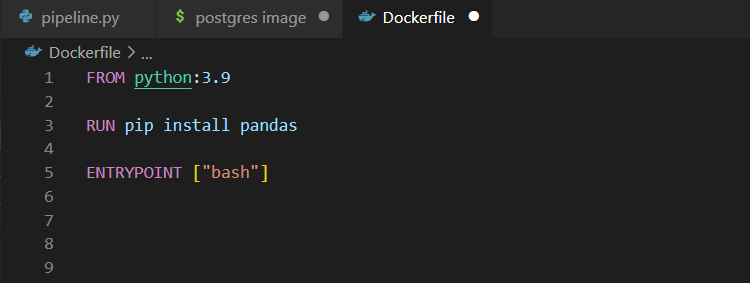



The above code is simple example of a Dockerfile, which is a script that defines the instructions for creating a Docker image. This Dockerfile is creating an image based on the official python image version 3.9 and it has three instructions:

1) <b>FROM python:3.9</b>: This instruction specifies the base image for the new image. In this case, the base image is python:3.9, which is an official image of Python version 3.9 provided by Docker.

2) <b>RUN pip install pandas</b>: This instruction runs a command inside the container to install the pandas library using pip. This will ensure that the pandas library is available in the image.

3) <b>ENTRYPOINT ["bash"]</b>: This instruction sets the default command that is executed when a container is started from this image. In this case, it is set to run the bash command, which will start a shell session inside the container. This allows the user to interact with the container and run commands inside it.

<b>NOTE:</b>

A Dockerfile should be saved in the root directory of your application, where the application's code and dependencies are located. The file should be named <b>Dockerfile</b> with no file extension (As you can see in the above screenshot). This is the default name expected by the <b>docker build</b> command, and using this name will make it easy to find and maintain.

It's worth noting that you can also specify a path to the <b>Dockerfile</b> when running the docker build command if it is not located in the current working directory. For example, if you have the Dockerfile in a subdirectory, you can use the <b>-f</b> or <b>--file</b> flag to specify the path to the Dockerfile, like <b>docker build -f /path/to/Dockerfile .</b>

## iii) Run the docker build command

![Alt text](images/image6.png)


The command <b>docker build -t test:pandas .</b> is used to build a new Docker image from the Dockerfile we created.

The <b>docker build</b> command takes the current directory (<b>'.'</b>) as the build context, which is the location where the Dockerfile and other files and directories that are needed to build the image are located. The <b>-t</b> option, or <b>--tag</b> option, specifies the name and optionally a tag to the name of the image in the name:tag format. In this case, the command is creating an image with the name <b>test</b> and the tag <b>pandas</b>.

Once the image is built, you can use the <b>docker images</b> command to check the list of images available on your machine and confirm that the new image with the name test and the tag pandas is present. Also, you can use the <b>docker run</b> command to start a container from this image and test it.

It's worth noting that you can also use other tags for the image, and you can use the <b>docker tag</b> command to add, remove or change the tags of an existing image.

## iv) Run docker images command to see if the image is present

![Alt text](images/image7.png)


As you can see, the first image is the one we created named as test and it's tag is pandas. One question that arises - Why does it show that the image was created 4 days ago? 

It's because we are using an image that was already present on my machine, instead of building a new one (I had already created an image with the same command earlier in the week). Docker keeps a local cache of images that were previously pulled or built on your machine. So when you run the <b>docker build</b> command, it checks the local cache for an image with the same name and tag before building a new one.

If an image with the same name and tag is found in the local cache, Docker will use that image instead of building a new one, even if the files in the build context have been modified. This is why the image is showing as created 4 days ago.

You can use the <b>docker images</b> command to check the list of images available on your machine, and use the <b>docker rmi</b> command to remove an image if you want to build a new one.

Also, you can use the <b>--no-cache</b> option with the <b>docker build</b> command to force a new build and ignore the cache.\
<b>docker build --no-cache -t test:pandas .</b>

<b>NOTE:</b>

If a new image has different instructions but the same name and tag as an already created image from cache, Docker will not automatically rebuild the new image.

As mentioned earlier, Docker uses a local cache of images that were previously pulled or built on your machine, so when you run the <b>docker build</b> command, it checks the local cache for an image with the same name and tag before building a new one. If an image with the same name and tag is found in the local cache, Docker will use that image instead of building a new one.

This means that the new image will not be rebuilt, even if the instructions in the Dockerfile have been modified. The container will use the cached image, which may not include the latest changes or updates.

To build a new image with different instructions and the same name and tag as an already created image from cache, you need to use the <b>--no-cache</b> option with the <b>docker build</b> command (mentioned above), which will force a new build and ignore the cache.

## v) Running a container from the built image

![Alt text](images/image8.png)


The command <b>docker run -it test:pandas</b> is used to start a new container from an image. Here we have ran <b>ls</b> to list the files and directories inside. Then we switched the terminal to a python one (by simply running <b>python</b>) and ran <b>import pandas as pd</b> command. This was done to check if pandas was installed as per our instructins from the image. Finally, we checked the version to see if it worked correctly.

Then we ran <b>exit()</b> to exit the python console. Then we ran <b>exit</b> to exit to exit the container.

<b>NOTE:</b>

If you run the docker run command again with the same image name and tag, it will create a new container, not reopen the previous one.

The <b>docker run</b> command creates a new container from an image each time it is run. It starts the container, runs the command specified in the command parameter, and then exits. Once the container exits, it is stopped and its state is lost, including any changes made inside the container.

You can use the <b>docker ps -a</b> command to list all the containers (including stopped ones) and look for the container id or name that you want to start.

![Alt text](images/image9.png)




# <font color='green'> 1.4) Running a script inside a container </font>

Now that we know how to build an image and create a container, let's proceed further and run a script inside a container by using the following steps:

## i) Create a sample python script which will be used inside the container


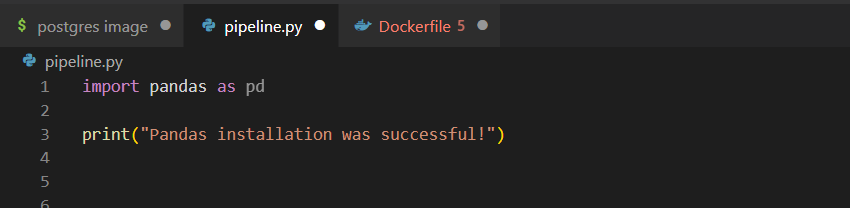



## ii) Modifying the Dockerfile to add more instructions

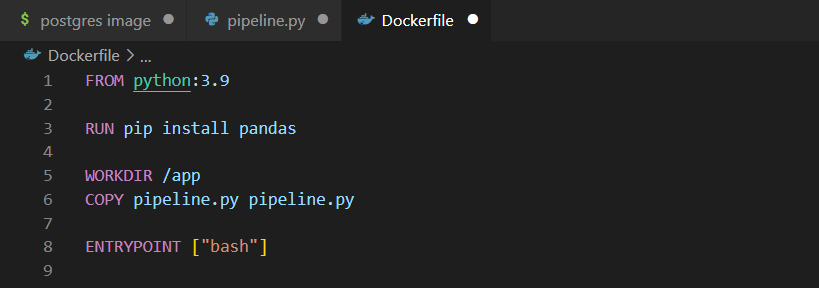

Here we're additionally adding 2 commands - WORKDIR and COPY

The working directory is set to /app, and the python file we created (see above) pipeline.py is copied into that directory. 

## iii) Building the Docker image

We're keeping the same name:tag combination and running the build command. Since the dockerfile got updated to include <b>pip install pandas</b>, you can see description about pandas installation. 

It also includes the other two commands that we additionally added - Creation of the working directory app and the Copying of our Python script inside the working directory

![Alt text](images/image10.png)


## iv) Running the container

As you can see, when we initiate the run command, the working directory directly shifts to the app directory which we created. When we run <b>ls</b>, we can see that the Python script we created (pipeline.py) has been copied as per our instructions. When we run the script, we get the desired output.

![Alt text](images/image12.png)


# <font color='green'>1.5) Passing arguments into a Container</font>

Instead of doing the script running manually, let's pass all of it as arguments inside the docker file and make it run automatically 

## i) Modifying the docker file

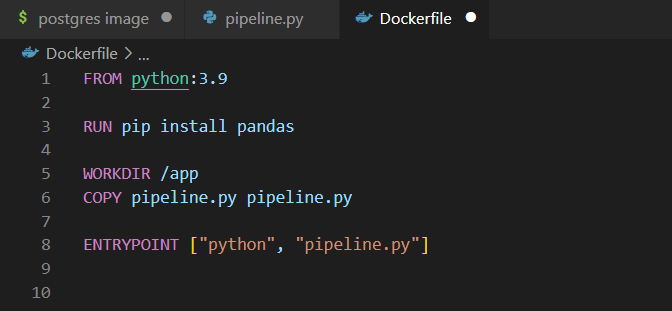

## ii) Updating the Python script to add some scheduling configuration 

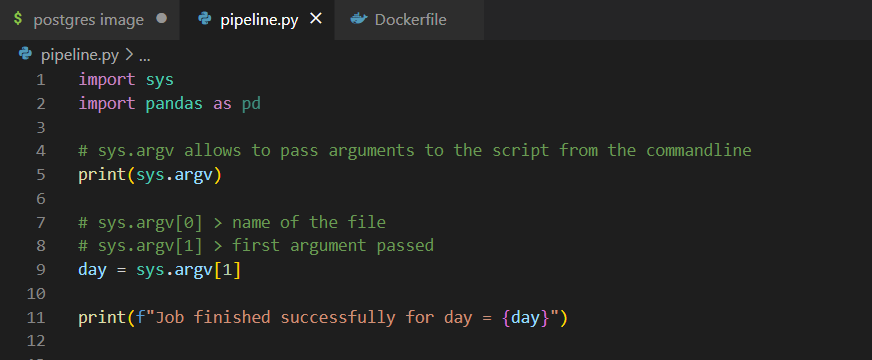

## iii) Building the Docker image

![Alt text](images/image13.png)


## iv) Running the Container

As we can see, when we ran the container, it automatically ran the Python script as instructed. Also, since we passed the date argument into the run command, it was used in the Python script as instructed and printed. 

![Alt text](images/image14.png)


## <font color='green'>1.6) Note on Docker Containers</font>

When you exit a Docker container, the container stops running but it is not automatically removed from the system. By default, the container's file system, network settings, and runtime state are all preserved. This allows you to start the container again later and pick up where you left off.

However, you can configure the container to automatically remove itself when it exits by using the <b>--rm</b> option when running the <b>docker run</b> command. This will remove the container and its associated resources (e.g., file system, network settings) from the system.

Additionally, you can use the <b>docker container prune</b> command to remove all stopped containers, which can help to reclaim disk space.

It's worth noting that when you remove a container, any data or changes made to the container's file system that have not been saved to a volume will be lost. To preserve data between container restarts or deletions, you can use volumes to mount data from the host machine or other containers.

# <font color='green'><a id='the_destination_2'>2) Ingesting NY Taxi Data to Postgres</a></font>

## i) Creating a folder (ny_taxi_postgres_data) in your working directory to store the container data 

![Alt text](images/image15.png)


## ii) Creating and running a postgres:13 image 


![Alt text](images/image16.png)


The above command uses the <b>docker run</b> command to start a new container based on the <b>postgres:13</b> image. The <b>-it</b> option runs the container in interactive mode, which allows you to interact with the container's command prompt.

The <b>-e</b> option is used to set environment variables inside the container. In this case, it sets the following environment variables:

* POSTGRES_USER to "root"
* POSTGRES_PASSWORD to "root"
* POSTGRES_DB to "ny_taxi"

The <b>-v</b> option is used to mount a volume from the host machine to the container. In this case, it mounts the directory /c/Users/aksha/Documents/Study/DE_Zoomcamp/Week1/ny_taxi_postgres_data from the host machine to /var/lib/postgresql/data inside the container. This allows the data stored in the Postgres database to persist even if the container is removed.

The <b>-p</b> option is used to map a container's port to a port on the host machine. In this case, it maps port 5432 inside the container to port 5432 on the host machine. This allows you to connect to the Postgres database running in the container from applications running on the host machine.

As mentioned earlier, The <b>winpty</b> command is used to run the <b>docker run</b> command in a Windows environment which allows the interaction with the container's terminal.


![Alt text](images/image17.png)



As you can see above, when we run the command, postgres:13 image is downloaded and all the relevant files are loaded into the container. This would mean that we would be able to access these files in the <b>/c/Users/aksha/Documents/Study/DE_Zoomcamp/Week1/ny_taxi_postgres_data</b> location we had passed in the command. 

The reason is that our command uses the -v option to mount a volume from the host machine to the container. The host path /c/Users/aksha/Documents/Study/DE_Zoomcamp/Week1/ny_taxi_postgres_data is being mounted to /var/lib/postgresql/data inside the container. This means that any files or directories created inside /var/lib/postgresql/data inside the container will be visible at /c/Users/aksha/Documents/Study/DE_Zoomcamp/Week1/ny_taxi_postgres_data on the host machine.

When the container runs, the Postgres server inside the container writes its data files, including the databases and their tables, to the /var/lib/postgresql/data directory. Since this directory is mounted to the host machine, any files created in this directory inside the container will be visible in the host machine at the specified host path, in this case /c/Users/aksha/Documents/Study/DE_Zoomcamp/Week1/ny_taxi_postgres_data. This allows you to persist data even if the container is stopped or removed.

In other words, the files in the ny_taxi_postgres_data folder of your local machine are the files that are created by postgres inside the container when it runs, because of the volume mount, the files are visible on the host machine.


## iii) Accessing the Database (postgres) inside the container

Now that we have created a postgres database, the next step is to access it. To do that we need to install pgcli. 

<b>Step 1:</b>

Open a new Gitbash window and run <b>pip install pgcli</b>

![Alt text](images/image18.png)

<b>Step 2:</b>

Run the command <b>winpty pgcli -h localhost -p 5432 -u root -d ny_taxi</b>, which would prompt for a password. Enter the password we created (root, in our case). This would create a connection with the database.

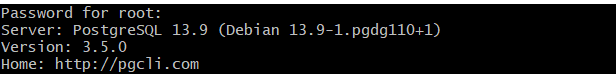


This command connects to a Postgres server running on the localhost, on port 5432, using the username "root" and the database "ny_taxi" where,

* -h flag specifies the hostname or IP address of the Postgres server,
* -p flag specifies the port number,
* -u flag specifies the username,
* -d flag specifies the database name.

If the Postgres server is running and accessible on the local machine on port 5432, and the user "root" exists and has the correct password, you should be able to connect to the "ny_taxi" database. Once the connection is established, you will be presented with the pgcli prompt and you can start executing SQL commands.

<b>Step 3:</b>

Run codes to ensure there's a connection to the database and check if it's working.

* Run the command <b>\dt</b> to see a list of tables available in our database - This returned empty as we have not populated the database with data
* Run the command <b>SELECT 1;</b> to check if it returns a value

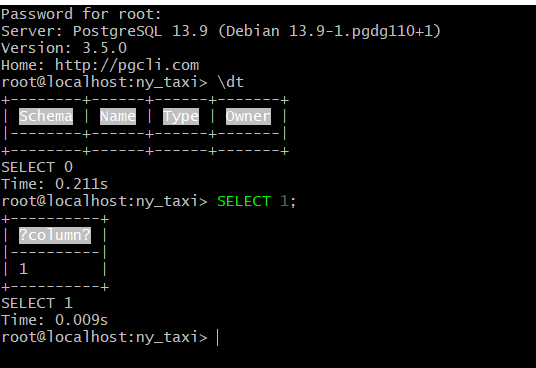


## iv) Creating a Jupyter Notebook

Install jupyter notebook in your system by running <b>pip install jupyter</b> and then run the command <b>jupyter notebook</b> to open the jupyter notebook terminal.

Create a new jupyter notebook and open it. I have named the notebook as <b>upload_data</b>

You can then run a few commands to check if it is up and running.

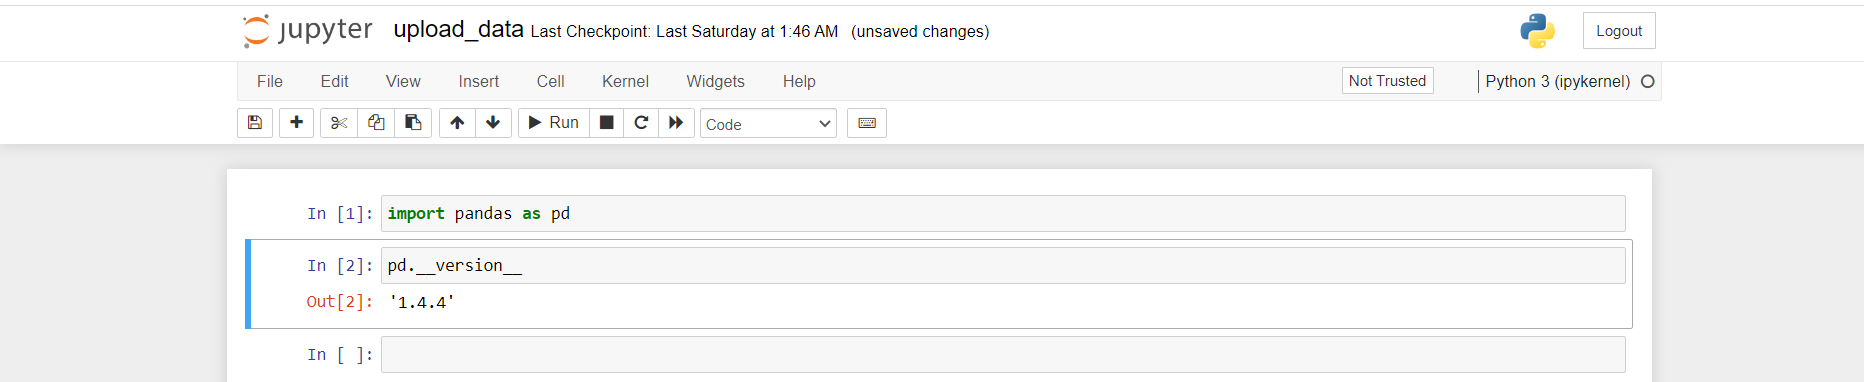



## v) Downloading the data in Jupyter and doing some pre-processing


<b>Step 1:</b>

Download the data from the Github location hosted by DatatalksClub and Amazon S3- 

Green Taxi Data - "https://github.com/DataTalksClub/nyc-tlc-data/releases/download/green/green_tripdata_2019-01.csv.gz" \
Taxi Zones - "https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv"

And then verify that the data has been loaded correctly.

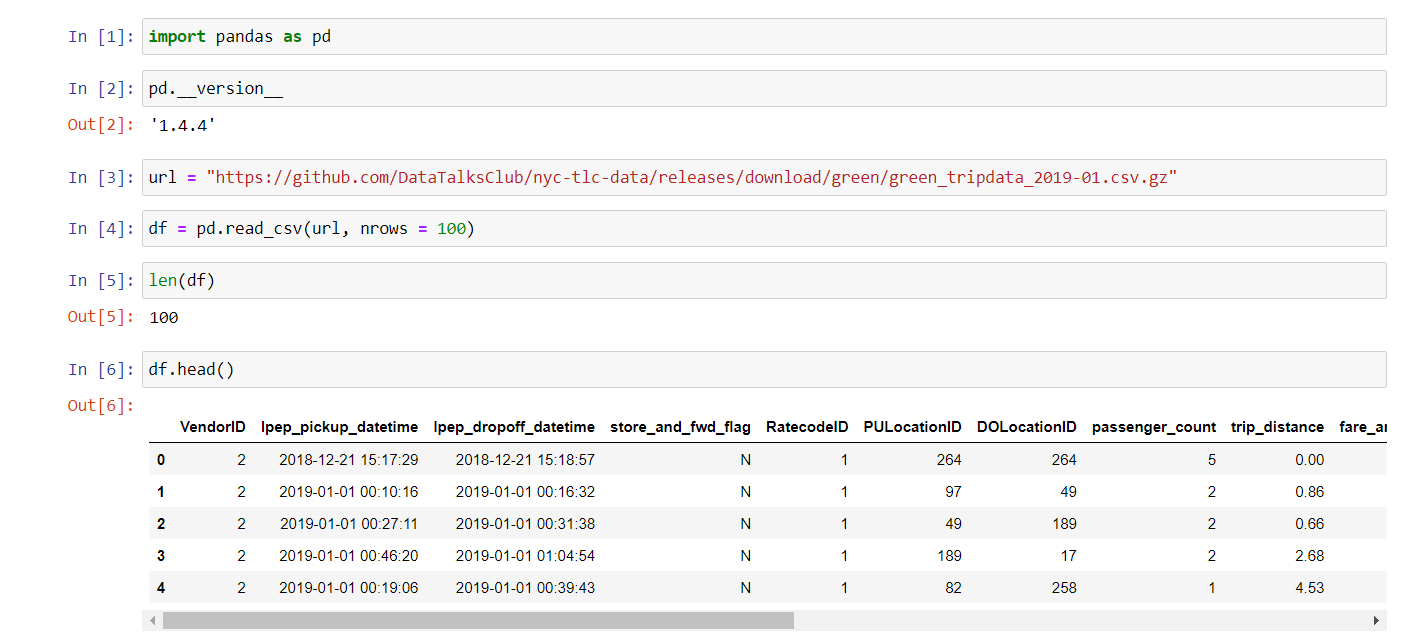

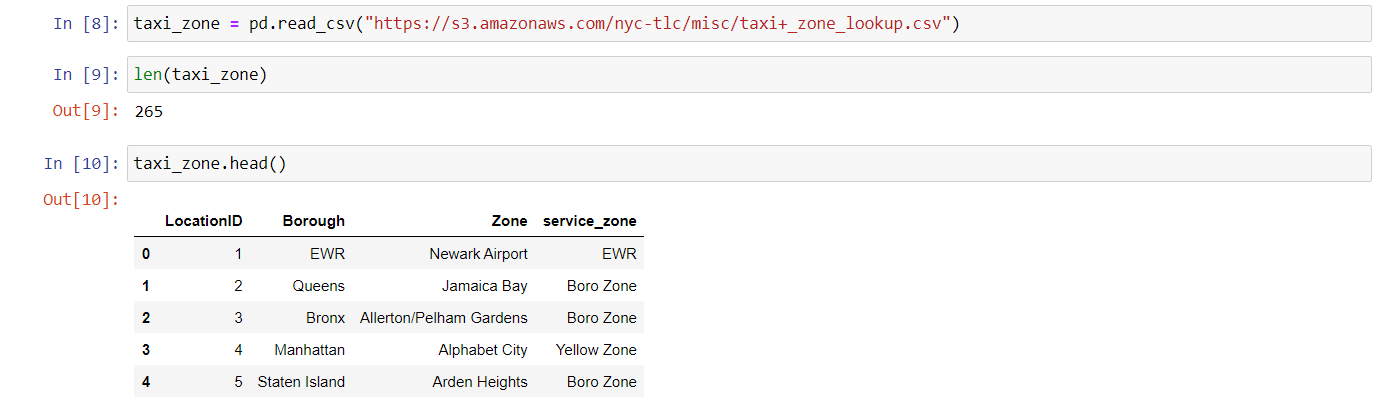

<b>Step 2:</b>

To put the data to postgres using Pandas, you need to first generate a Schema of the dataset, which is an instruction to create a table that specifies the columns and thier data types that you want to have in the table.

Run <b>print(pd.io.sql.get_schema(df, 'green_taxi_data'))</b> to generate the schema of the data.

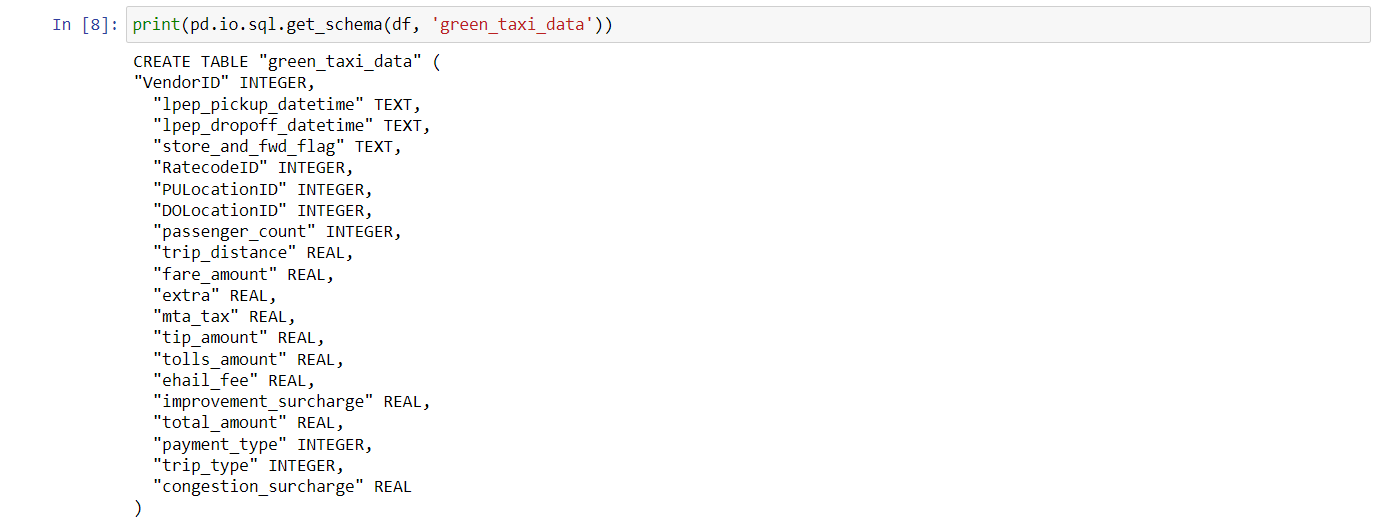

This shows how the table would look like when created. We still need to establish a connection between pandas and postgres and then run this command to create a schema in postgres. This was run just to show how the code works.

<b>Step 3:</b>

Before creating the connection, we need to do a small update. As can be seen in the above screenshot, the two date columns (<b>lpep_pickup_datetime</b>, <b>lpep_dropoff_datetime</b>) have their data type as <b>TEXT</b>. It would be useful to convert them to Date data type so that the data processing down the line becomes easier.

We can use the Pandas <b>to_datetime</b> function to convert datetime text to datetime object. Pass the column name to the function and assign the values to the same column name.

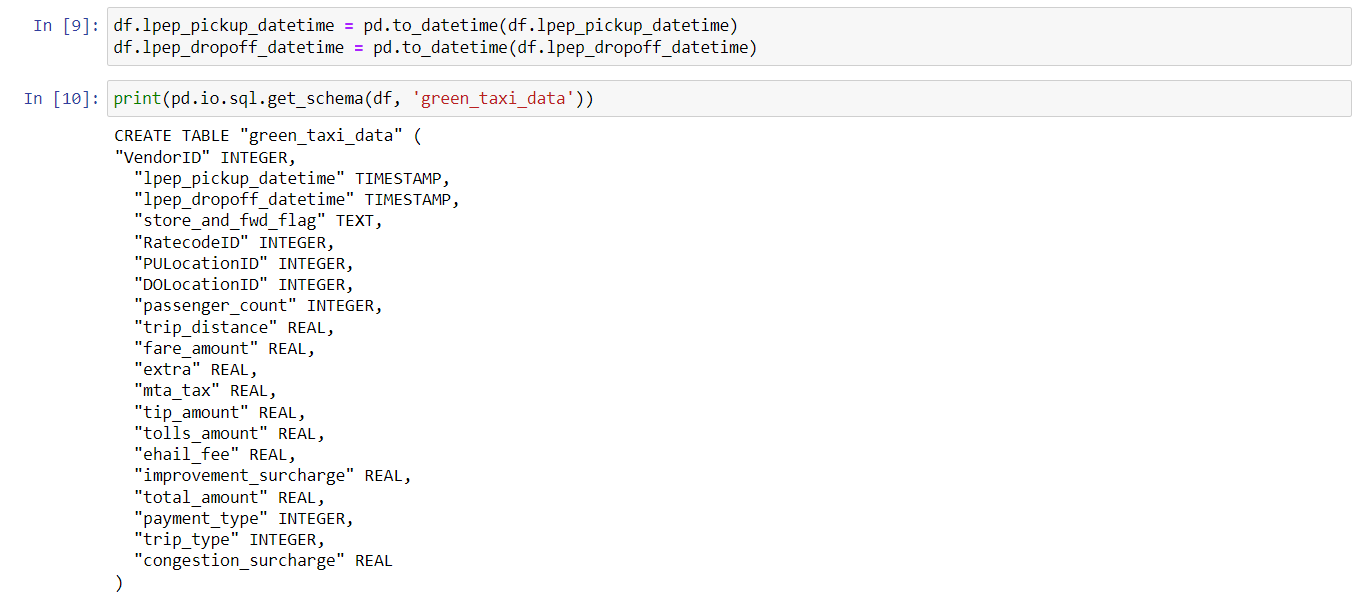

As you can see above, after running the command, the data type has changed to <b>TIMESTAMP</b> for both the columns

Please note that the schema generated is not optimized as some more data types could still be converted. But, since this is just a sample, we're not focusing too much on the schema yet.

## vi) Establishing a connection and then putting the Schema into postgresql and loading in the data

<b>Step 1:</b>

Establishing Connection

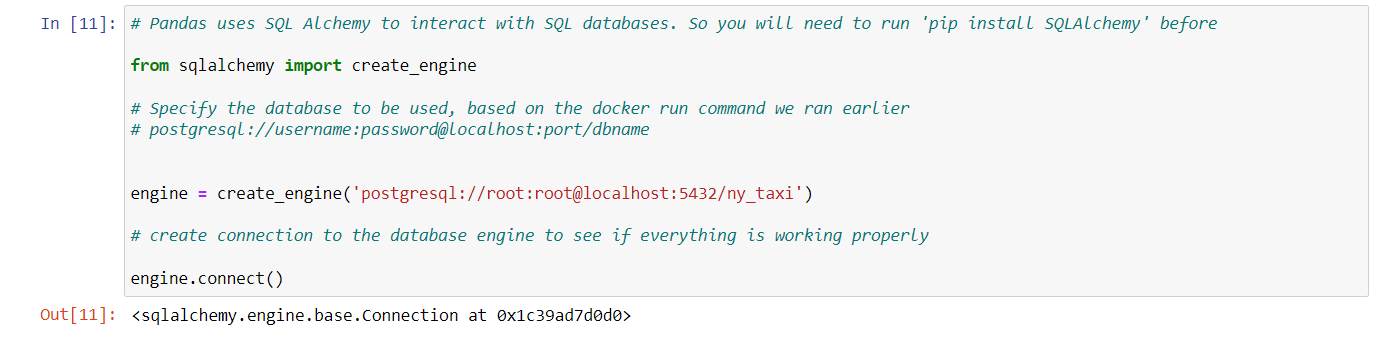

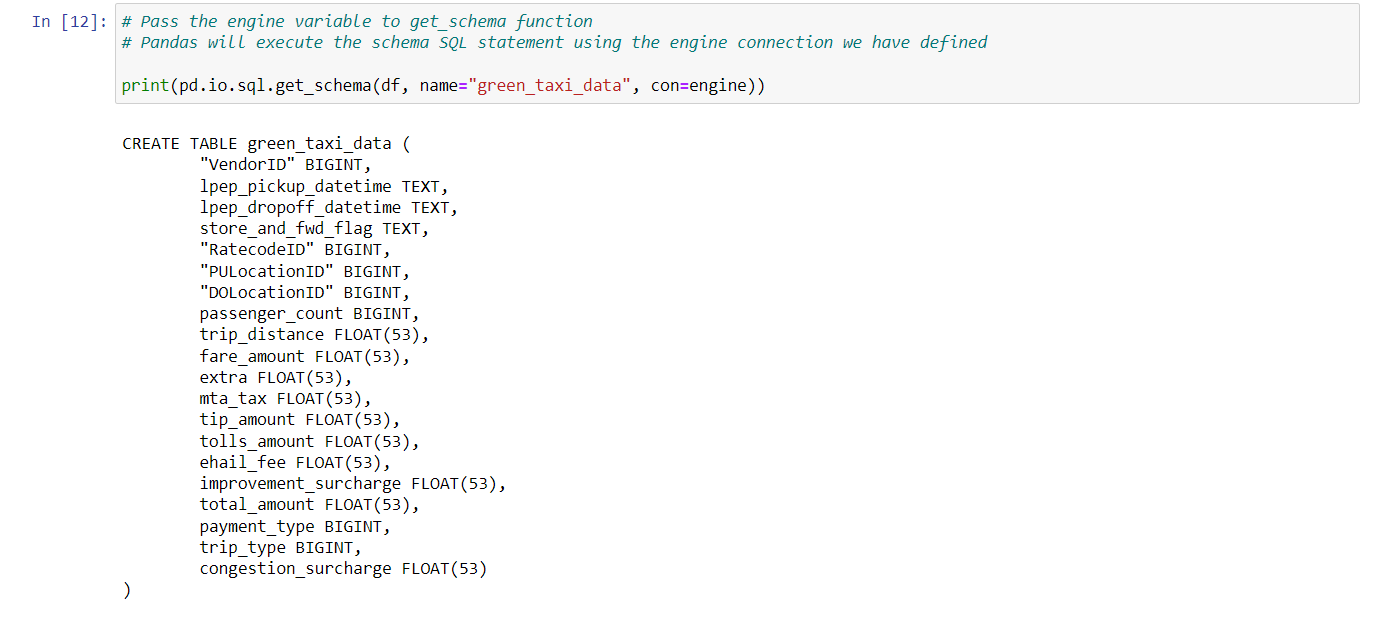

<b>Step 2:</b>

Putting the Schema into postgres and creating a iterator to load the data

Since the entire dataframe is too big to process at once, we will chunk the CSV file into smaller batches. To do that we can use the iterator argument of the pd.read_csv function and declare the chunksize. The iterator argument allows iterating through n number chunks to build up the entire dataset. Using this method doesn't result in a dataframe but a type of iterator.

You can apply the next function to cycle/iter through 100000 rows of chunks of data.

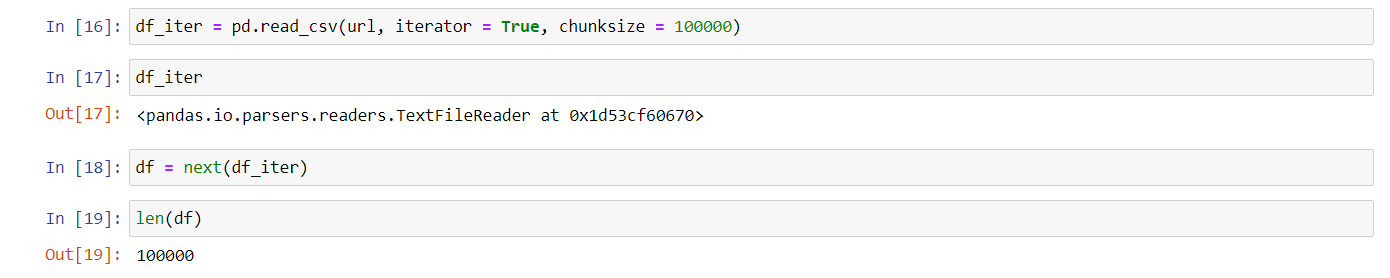

<b>Step 3:</b>

Loading the column names into postgres:

We can use to_sql to first load the column names and create the schema in postgres.

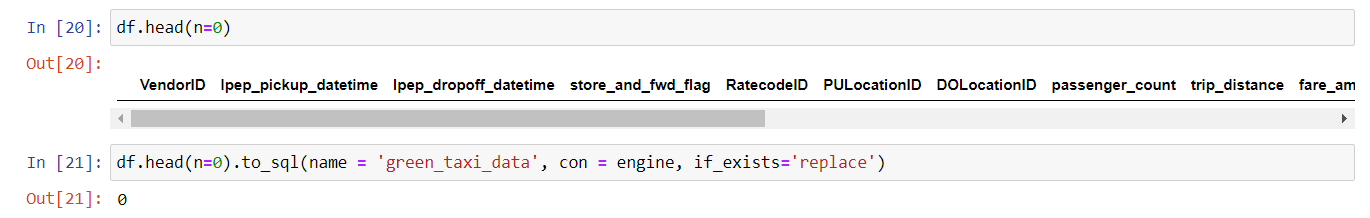

After running this, we can check if the schema got created inside postgres using pgcli. As we can see below, the schema is available and currently doesn't have any records populated.

We ran <b> \dt</b> to see the list of tables. To see details about the table run <b> \d green_taxi_data</b>

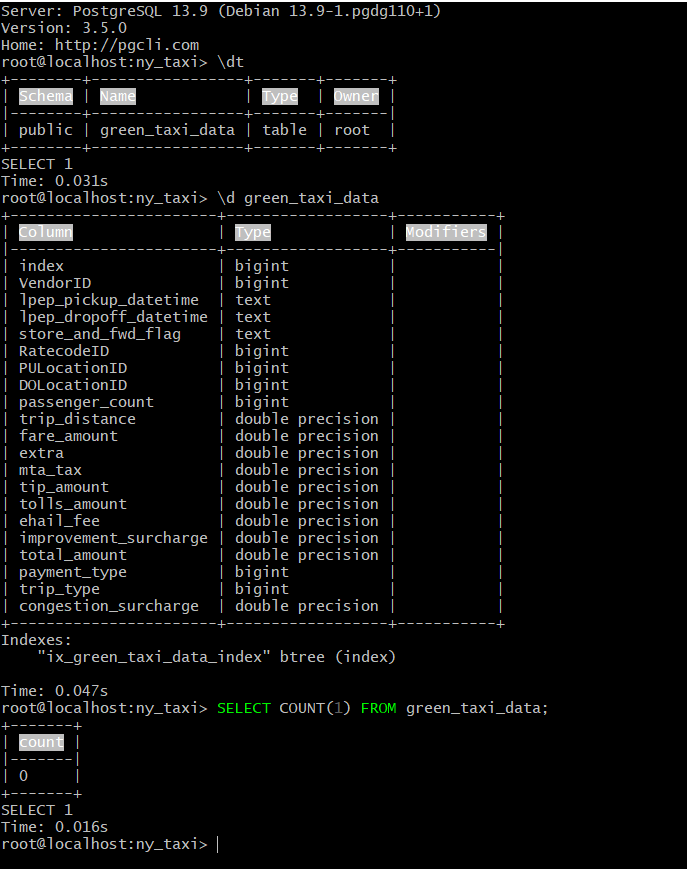


<b>Step 4:</b>

Loading in the data iteratively using a for loop. 

There were a total of 7 chunks as the data size was 630,918 [6 chunks of 100,000 and a final chunk of 30,918, since we passed chunk_size as 100,000. Check Step 2 for reference]

Here, we have changed the if_exists argument to 'append' so that we can append the records on top of the existing table (which only had the column names)

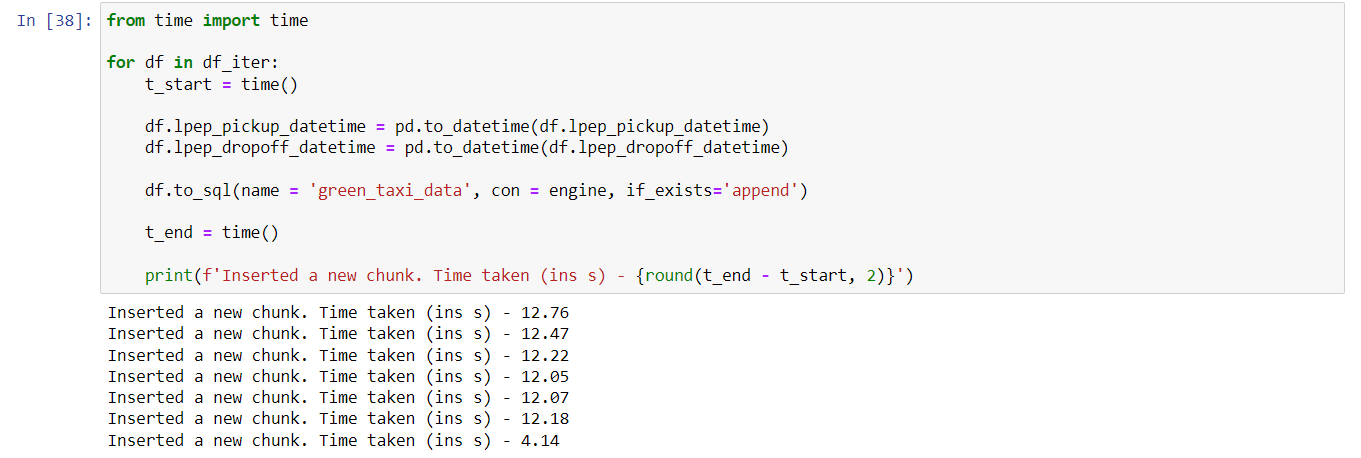

Checking if the data got loaded correctly in postgres using pgcli. 

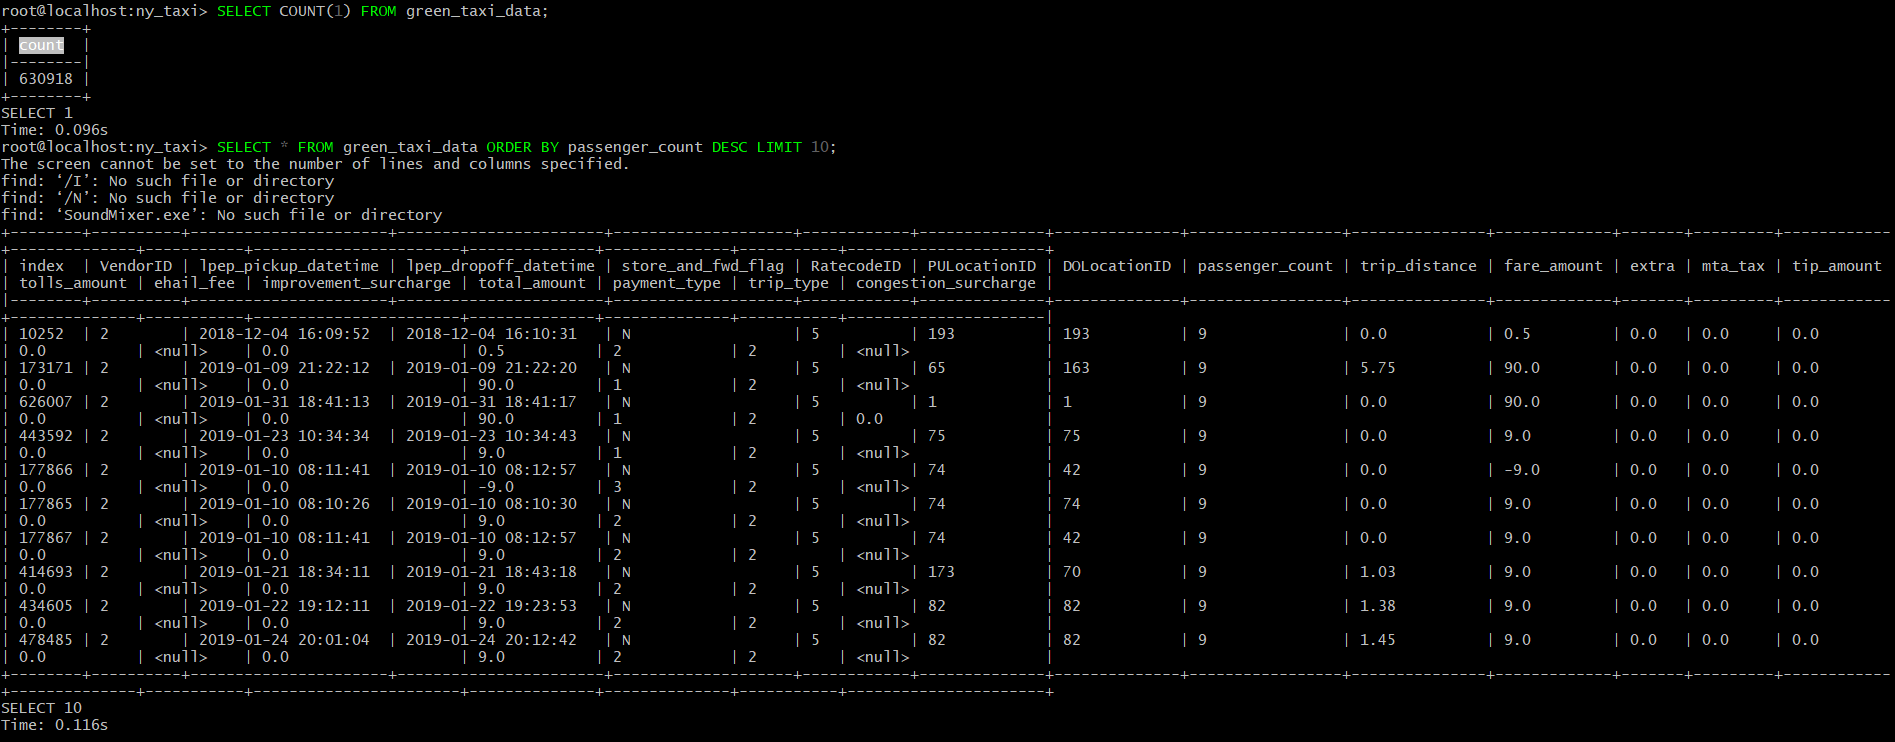






We have successfully loaded the data into the postgres database and now can use it to perform data analysis.

# <font color='green'><a id='the_destination_3'>3) Connecting pgAdmin and Postgres</a></font>

As we can see from the previous screenshot, using pgcli might get difficult as we're not able to see the data clearly and the interface looks clunky. In order to overcome this, we can use pgAdmin. 

pgAdmin is a free and open-source administration tool for the PostgreSQL database management system. It provides a graphical user interface for managing and interacting with PostgreSQL databases, allowing users to perform tasks such as creating and modifying tables, managing users and permissions, and running SQL queries. It is available for Windows, Linux, and macOS.


<b>Step 1</b>

Rather than installing pgAdmin directly we can use docker to install a pgAdmin container.

We will be using the following command -
  

  
This command is used to run the pgAdmin tool in a Docker container. The command is starting a new container and maps port 8080 on the host to port 80 in the container.

* The option -it starts the container in interactive mode and assigns a terminal for it.
* The -e option sets environment variables for the container. In this case, it sets the default email and password for the pgAdmin web interface.
* The -p option maps the port 8080 on the host to port 80 in the container, which is the default port for the pgAdmin web interface.
* The last argument dpage/pgadmin4 specifies the image to be used for the container.

<b>Step 2</b>

The command will run pgAdmin in a container, and you will be able to access the pgAdmin web interface by navigating to http://localhost:8080 in a web browser. Once you login with the default email and password, you will be able to manage your PostgreSQL server via the web interface.

Enter the username and password we passed in our command and you'll be able to login.

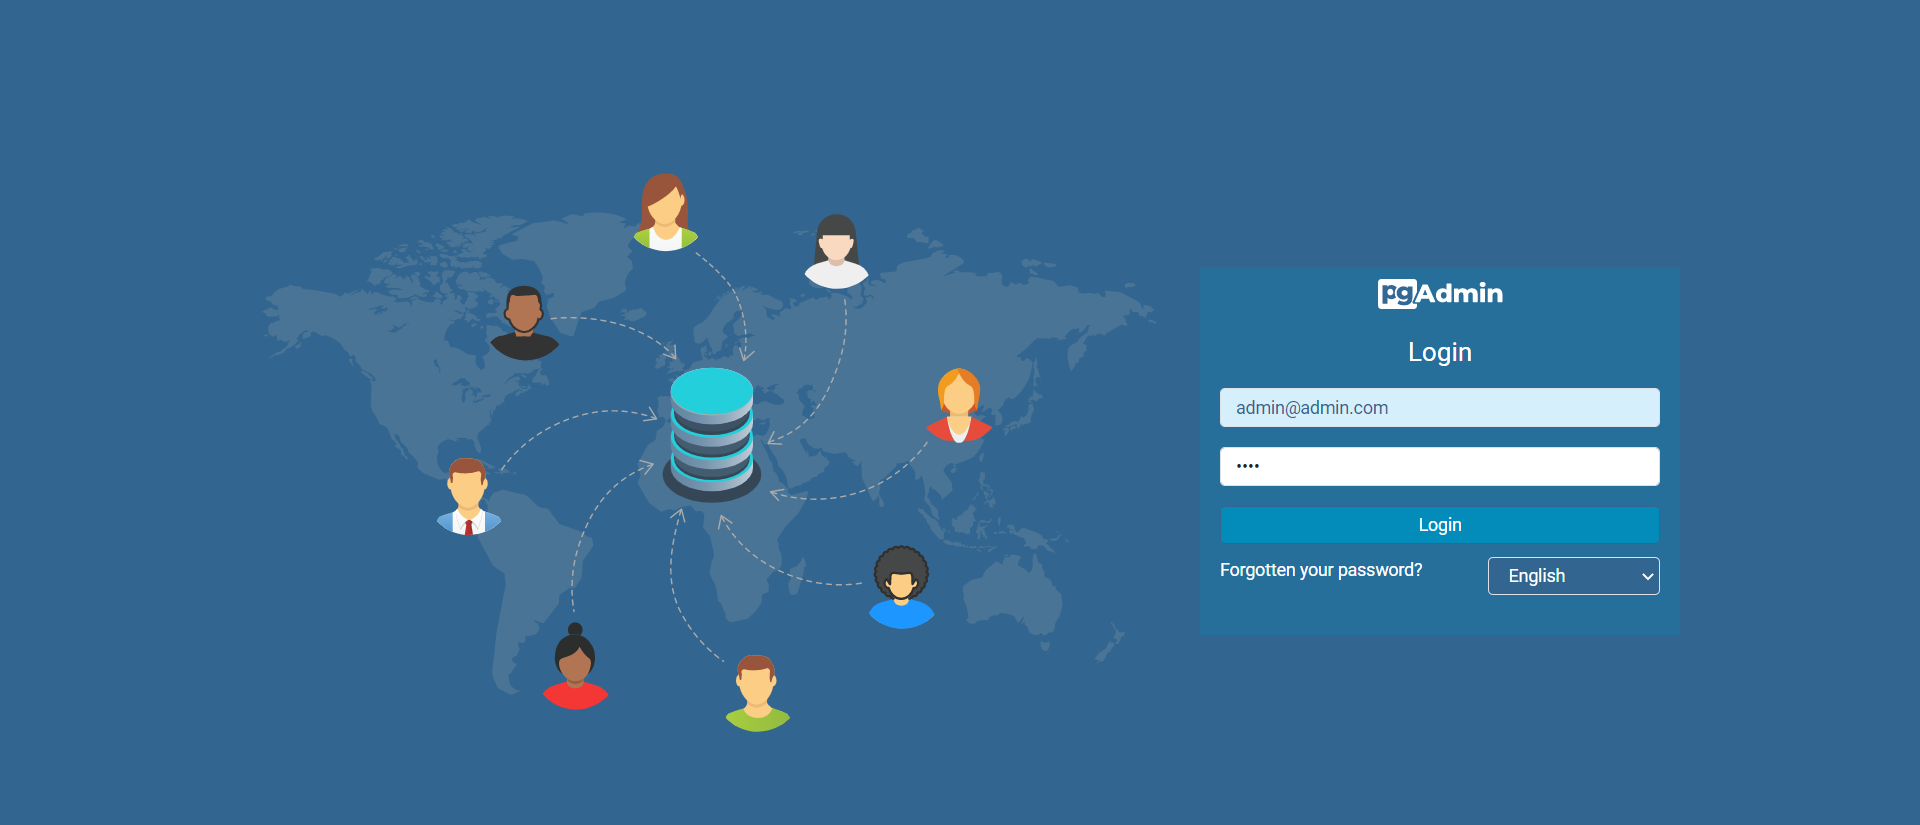


<b>Step 3</b>

Next, we need to create a server by entering the details about the postgres server. 

But before that, since the container having the pgAdmin and the container having the Postgres server are different, we need to connect them into a single network.

Before we do that, we need to stop both the containers. Then, we need to create a new network and rerun the containers by adding an instruction for the network as you can see below

![Alt text](images/image19.png)

![Alt text](images/image20.png)

![Alt text](images/image21.png)

As you can see above, we have added 2 new instructions for both -
* --network - Here we have given a network name as 'pg-network' so that we can use it to pass a connection between Postgres and pgAdmin
* --name - Similarly, we have given individual names for each of them so that they can be used in the connection

<b>Step 4</b>

Enter the relevant details in the pgAdmin console and create a connection. 

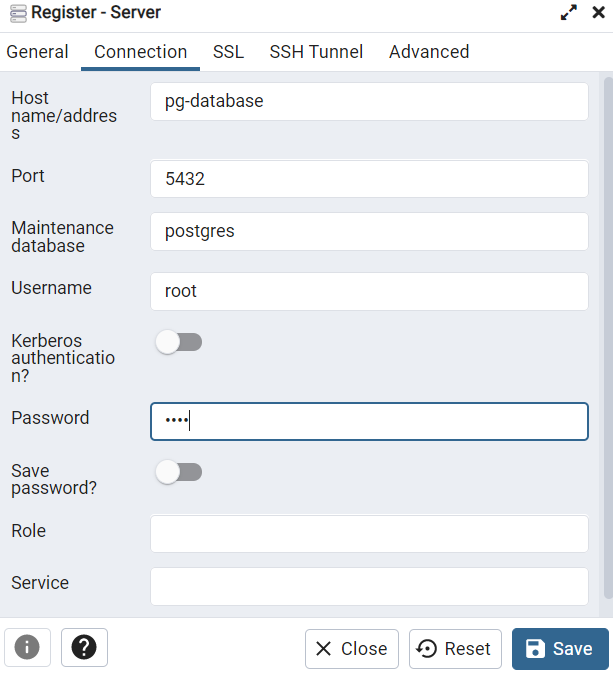


We can see that the ny_taxi database is present and that the green_taxi table is available inside that database.

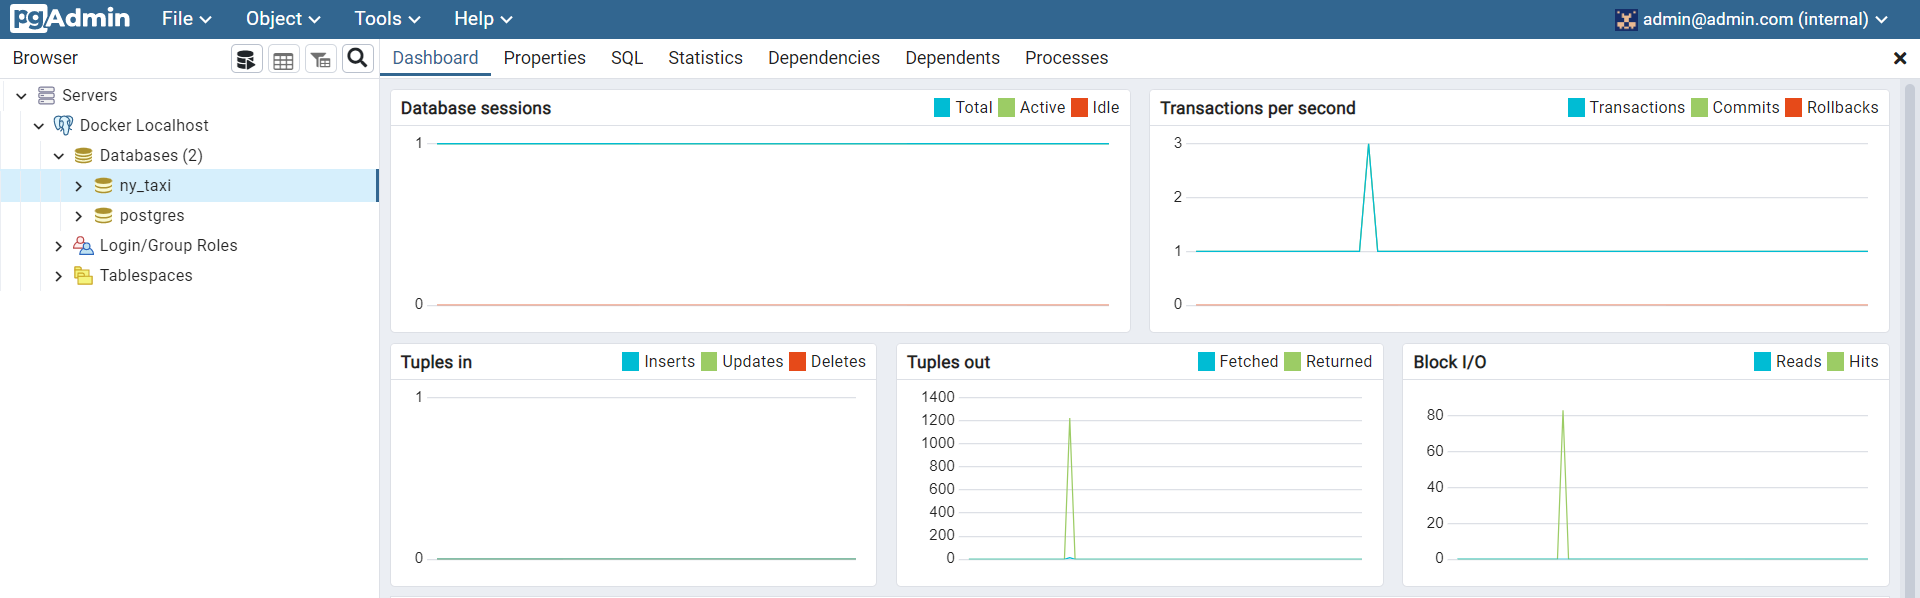


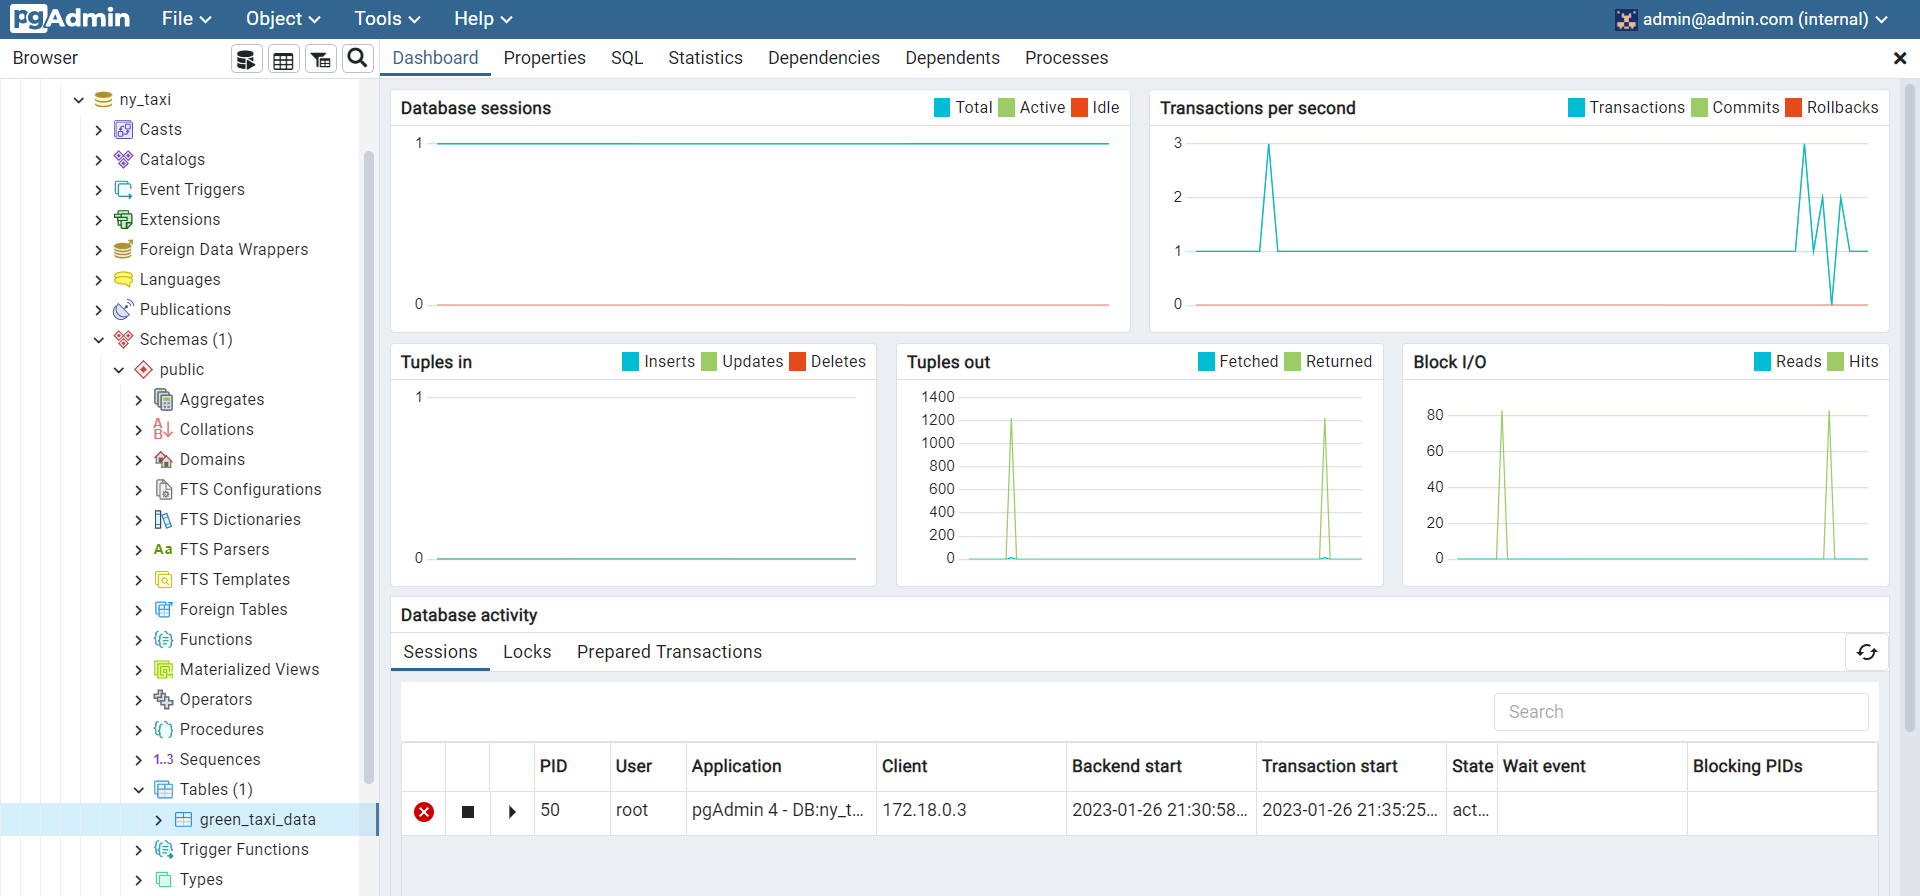


<b>Step 5</b>

Run some basic SQL queries using the query editor to explore the data

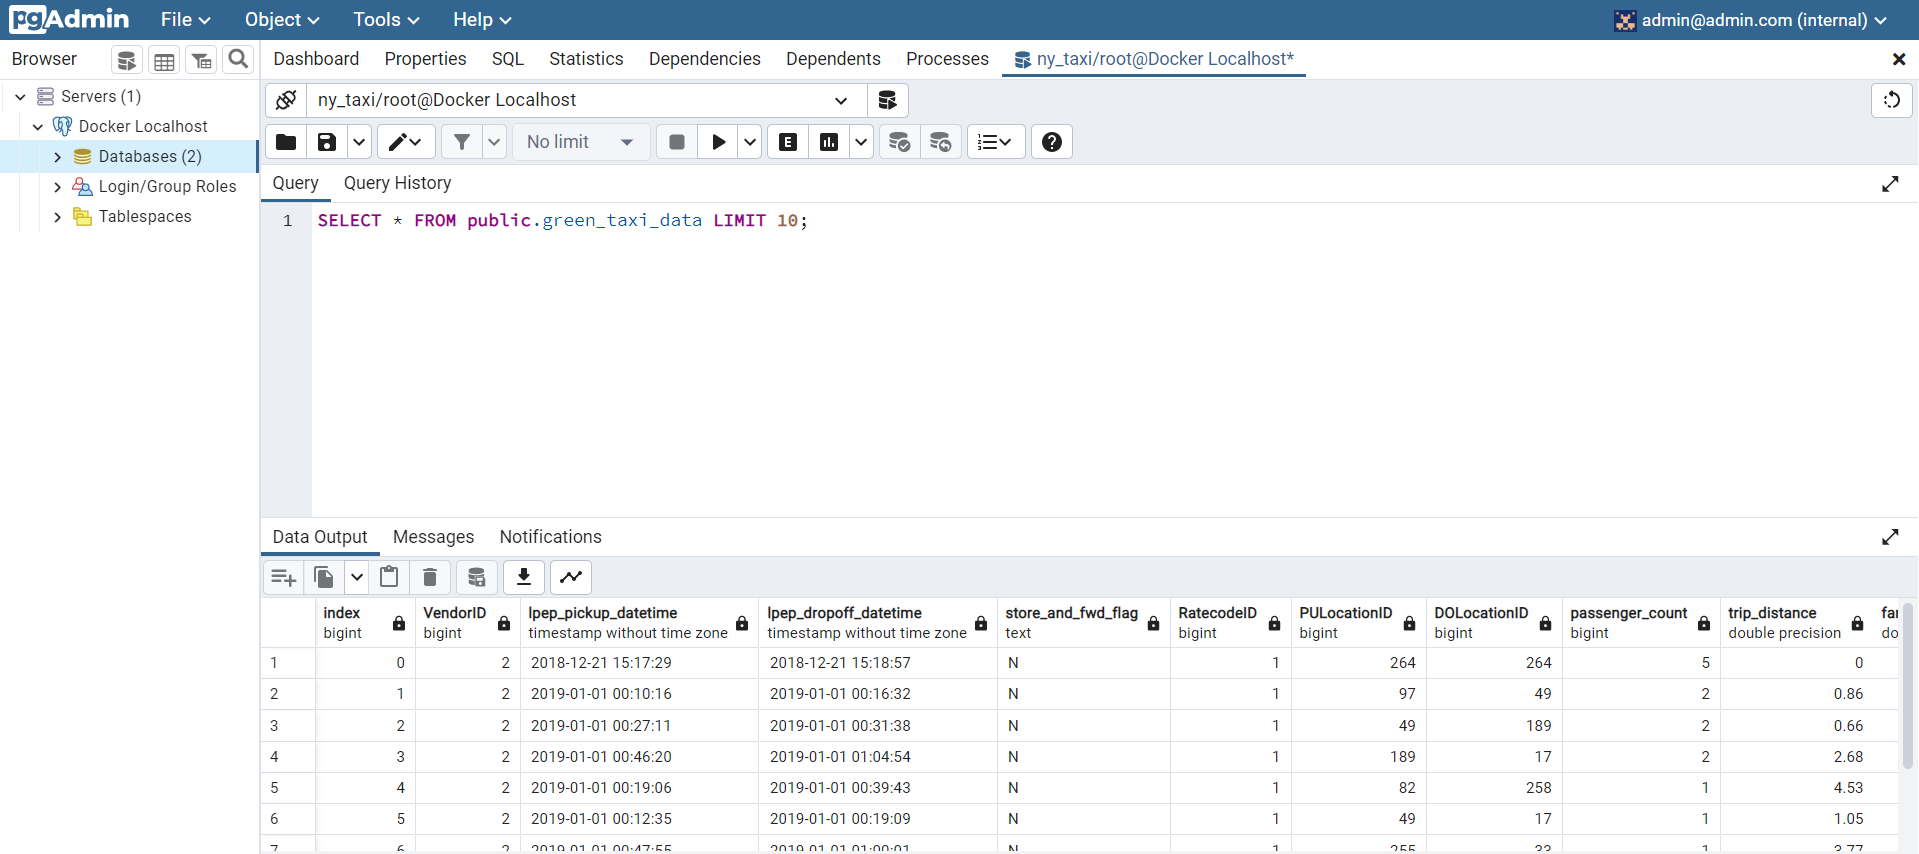

# <font color='green'><a id='the_destination_4'>4) Dockerizing the Ingestion Script</a></font>

<b>Step 1:</b> 

Convert the Jupyter notebook into a script by saving it as .py file. Before converting, make relevant changes to the script and remove all the unnecessary commands.

The below screenshot shows the update script. The script is saved as `ingest_data.py`. But before running this, we still need to add a few more commands which you can see in Step 2.


<b>Step 2:</b> 

Using `argparse` to parse command line arguments. 

The `argparse` module makes it easy to write user-friendly command-line interfaces. The program defines what arguments it requires, and argparse will figure out how to parse those out of `sys.argv`. The argparse module also automatically generates help and usage messages. The module will also issue errors when users give the program invalid arguments.

Find below the updated `ingest_data.py` script after adding the parse function.


![Alt text](images/image24.png)


In a script, `parse_args()` will typically be called with no arguments, and the `ArgumentParser` will automatically determine the command-line arguments from `sys.argv`.


<b>Step 3:</b>

Run the command `DROP TABLE green_taxi_data;` and `DROP TABLE taxi_zone;` in pgAdmin in order to drop the existing tables so that we can run the Python script we just created which would re-create the same tables.

Run a `SELECT` command to ensure that the table is dropped.

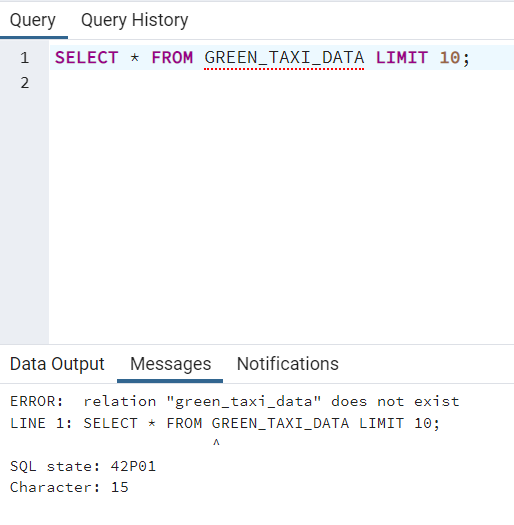

<b>Step 4:</b>

Run the following command to successfully execute the `ingest_data.py` script and upload the data into postgres.

![Alt text](images/image22.png)


<b>Step 5:</b>

Check if the data is available in postgres database using pgAdmin.

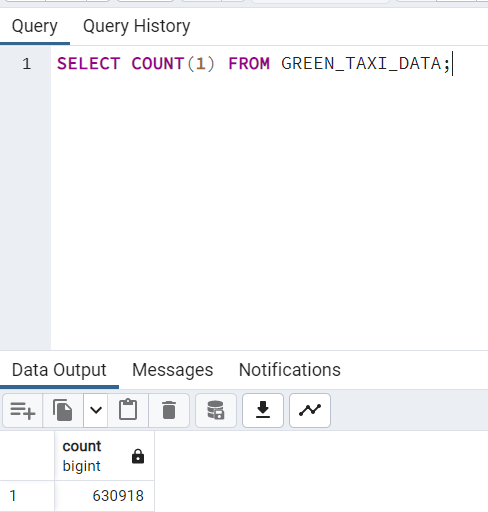

We can see that the data has been loaded successfully.

<b>Step 6:</b>

Now that we have confirmed the working of the `ingest_data.py` script, we can dockerize the whole thing.

To do that, let's update the Dockerfile. Look at the screenshot below for the changes made.

![Alt text](images/image25.png)

Then we need to run the following docker build command - `docker build -t taxi_ingest:v001 .`

After running this command, we then need to run the container command which is the following -

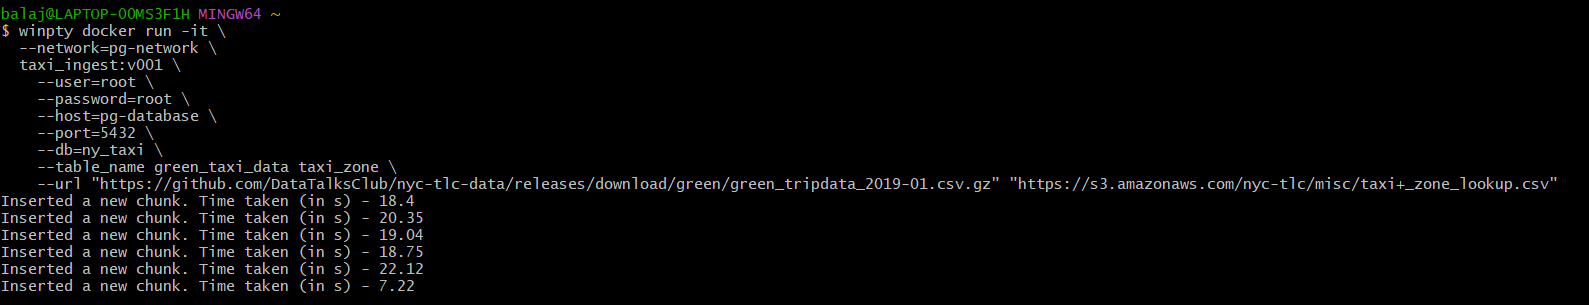

One thing you can notice in the above command is that we have updated the `--host` to `pg-network` since we're connecting inside a container and not in the local machine. That's why we have additionally added `--network=pg-network` to point to the correct network.

Thus, we have successfully dockerized the entire ingestion process.

# <font color='green'><a id='the_destination_5'>5) Running Postgres and pgAdmin with Docker Compose</a></font>

So far, we were creating containers separately and then connected them into a single network. The whole process seemed cumbersome and messy to do. In order to avoid the mess, we can use something known as Docker Compose.

### <font color='green'>Docker Compose</font>

Docker Compose is a tool for defining and running multi-container Docker applications. It allows you to configure and run multiple containers, networks, and volumes in a single YAML file. This makes it easy to manage and configure multiple containers as part of a single application.

Docker Compose uses a `docker-compose.yaml` file to define the services (containers), networks, and volumes that make up an application. The file is written in YAML, which is a human-readable format for specifying configuration settings.

For example, you can use Docker Compose to define a web server container, a database container, and a cache container, and then start all of them with a single command. You can also configure the network and data volumes that the containers need to share.

You can use `docker-compose up` command to start the services defined in the `docker-compose.yaml` file and `docker-compose down` command to stop the services.

Docker Compose also allows you to scale the number of replicas of a service, update the service's configuration, and view the status of the containers running the service. It makes it easy to manage and scale multi-container applications, especially when combined with other Docker tools such as Docker Swarm or Kubernetes.

<b>Step 1</b> 

Configure the docker-compose.yaml file as shown below

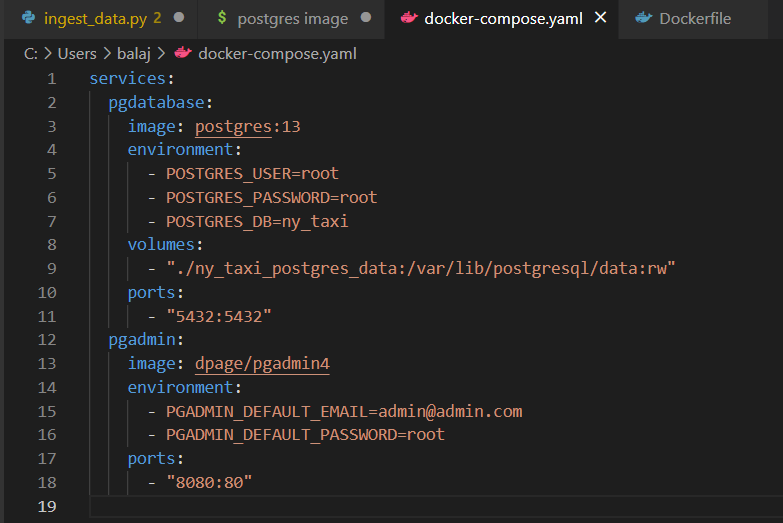

This is a Docker Compose file that sets up two services: `pgdatabase` and `pgadmin`.

The pgdatabase service uses the `postgres:13` image, which is a pre-built image of PostgreSQL version 13. The environment variables POSTGRES_USER, POSTGRES_PASSWORD, and POSTGRES_DB are set to root, root, and ny_taxi, respectively. This service also uses a volume, which is a way to share files between the host and the container. The volume is defined as "./ny_taxi_postgres_data:/var/lib/postgresql/data:rw" , which means that the local directory ./ny_taxi_postgres_data will be mapped to the directory /var/lib/postgresql/data inside the container, and the container will have read and write access to this directory. The service also maps port 5432 on the host to port 5432 inside the container.

The pgadmin service uses the `dpage/pgadmin4` image, which is a pre-built image of pgAdmin 4. The environment variables PGADMIN_DEFAULT_EMAIL and PGADMIN_DEFAULT_PASSWORD are set to admin@admin.com and root, respectively. The service maps port 80 on the host to port 80 inside the container.

When you run docker-compose up, it will start the two services defined in the compose file.

Note that the ./ny_taxi_postgres_data directory should be present in the current working directory, otherwise the volume will not be created and the data will not be persistent.

<b>Step 2</b> 

Stop all the containers we have created so far. Use `docker ps` to ensure all the containers are stopped

<b>Step 3</b> 

Run the `docker-compose up` command to start the services defined in the `docker-compose.yaml` file

![Alt text](images/image26.png)

<b>Step 4</b> 

Refresh pgAdmin web interface, login and then recreate and reconfigure connections to the pgdatabase server.

![Alt text](images/image27.png)
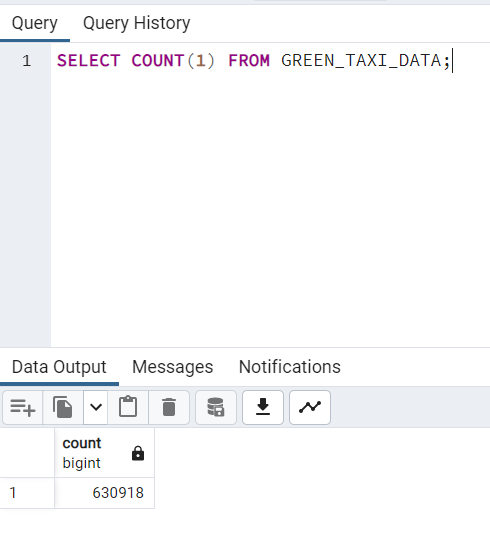

Instead of manually setting up the connection every time in pgAdmin, we can use the below `YAML` script to directly connect. 
Here, we have added a volumes variable for pgAdmin, which is defined as "pgadmin_conn_data:/var/lib/pgadmin:rw", which means that the local directory pgadmin_conn_data will be mapped to the directory /var/lib/pgadmin inside the container, and the container will have read and write access to this directory.

The volumes section defines named volumes that can be used by other services. The pgadmin_conn_data is a named volume that is used by the pgadmin service.

Note that the ./pgadmin_conn_data directory should be present in the current working directory, otherwise the volume will not be created and the data will not be persistent.

When you run docker-compose up, it will start the two services defined in the compose file and the volumes.

![Alt text](images/image23.png)

<b>Step 5</b> 

Use `docker-compose down` command to stop the services

![Alt text](images/image28.png)

